# Simulating the extraction from a long guide with gravity

# extraction without Gravity and finite circular beam
## Simulation of data

In [1]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03
sim.num_neutrons = 1e7
pd = sim.params_dict
pd['g'] = 0
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
#print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1


## Data from hard to handle mcstas save folder to easier data dict

In [32]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()

with open('data/data_{}_g_length{}.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

## Evaluation and plotting of data
### Here with gravity

g1_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.715512286497197
49.509394867288904 49.4766317557457 [-10.9, 10.9, -10.9, 10.9]
-0.0051457345933716425 0.0020687687565459356
6.758000000000001 0.3
8.72 0.5
10.464 0.7
g1_divpos.dat
g1_divv_lambda.dat
f_divv_lambda.dat
f_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.6807591546719044
49.50118263287147 49.4942247817591 [-10.9, 10.9, -10.9, 10.9]
-0.0012717147237530924 0.0002604181474552547
1.308 0.3
2.8340000000000005 0.5
5.232 0.7
source_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 1.1924033015635371
49.50126096010832 49.50004258580703 [-10.9, 10.9, -10.9, 10.9]
9.377480740369037e-06 0.0002776659632459655
0.872 0.3
1.09 0.5
1.308 0.7
f_psd_zoom.dat
[-1.5 -1.  -0.5  0.   0.5  1.   1.5]
intensity 0.2651227721210293
49.52053683761495 49.49156964832158 [-1.5, 1.5, -1.5, 1.5]
-0.00025546520237629267 0.0006223284125741468
0.66 0.3
0.93 0.5
1.17 0.7
f_divpos.dat
source_psd_beforeoptic.dat
[-15. -10.  -5.   0.   5.  

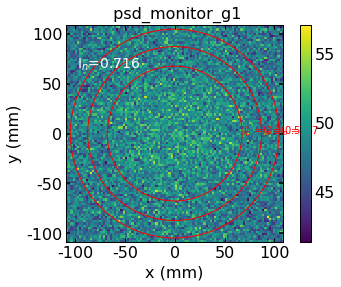

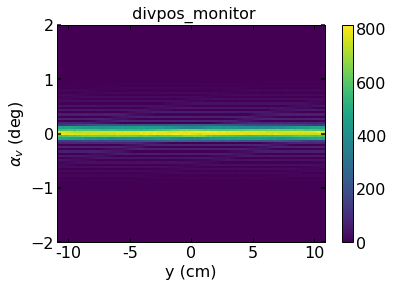

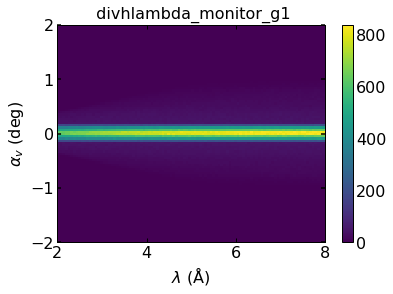

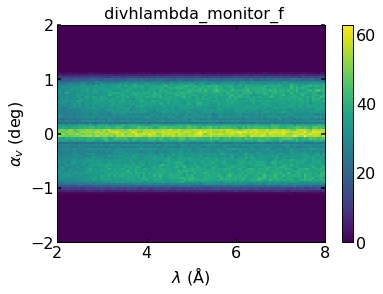

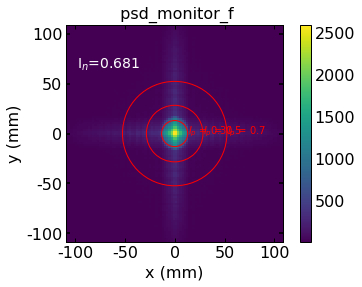

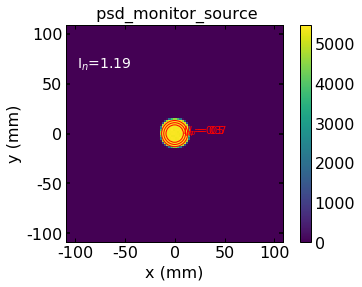

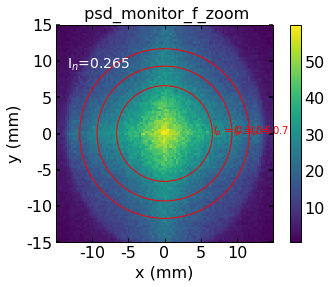

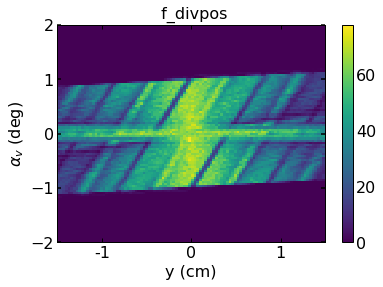

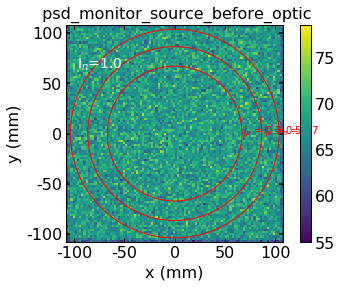

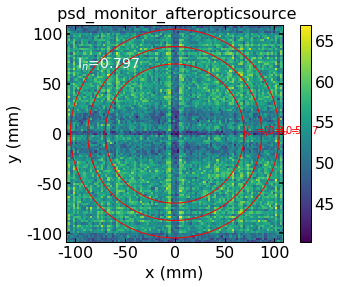

In [5]:
import image_thresholds

with open('data/data_zero_g_length160.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160.txt', 'rb') as file:
    meta_dict = pickle.load(file)


#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_dict, image_data_dicts=image_data )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_dict[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        print(midy, midx, extent)
        figax = fig, ax
        image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
             figax=figax, extent=extent, thresholds=[0.30, 0.5, 0.70])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    #fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_data[key][' g']) == 0 else 'finite'))


# Plot radius vs intensity for detector in the focal point

In [1]:
import pickle
with open('data/data_zero_g_length160.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160.txt', 'rb') as file:
    meta_dict = pickle.load(file)
image_data.keys()

dict_keys(['g1_psd.dat', 'g1_divpos.dat', 'g1_divv_lambda.dat', 'f_divv_lambda.dat', 'f_psd.dat', 'source_psd.dat', 'f_psd_zoom.dat', 'f_divpos.dat', 'source_psd_beforeoptic.dat', 'sourceafteroptic_psd.dat'])

Text(0, 0.5, '$I_e$ (arb. u.)')

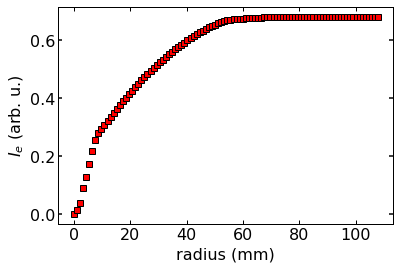

In [8]:
import matplotlib.pyplot as plt
import image_thresholds
array = image_data['f_psd.dat'][:100]
radint = image_thresholds.radius_vs_content(array, mid_x = 49.5, mid_y=49.5)
fig, ax = plt.subplots(1)
x, y = zip(*radint)
y = np.array(y)*0.681
x = np.array(x)/100*218/2
ax.plot(x, y, linestyle=' ', markeredgewidth=1)
ax.set_xlabel('radius (mm)')
ax.set_ylabel('$I_e$ (arb. u.)')

# Exraction from long guide finite beamspot and gravity
## Simulation of data


In [8]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03
sim.num_neutrons = 5e7
gravity = -9.81

sim.gravity = True if gravity else False
pd = sim.params_dict
pd['g'] = gravity
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
#print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr --gravity det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=-9.81 max_div=10 pixels=100 flux=50000000.0 placeholder=1


In [4]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()
print('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']))
with open('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

data/data_finite_g_length160finite_beamspot.txt


## Import data from pickle files

g1_psd.dat -10.9
source_psd_beforeoptic.dat -10.8157
g1_divpos.dat -0.109
f_divpos.dat -0.015
sourceafteroptic_psd.dat -10.9
g1_divv_lambda.dat 2.0
f_divv_lambda.dat 2.0
source_psd.dat -10.9
f_psd.dat -10.9
f_psd_zoom.dat -1.5
g1_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.7146770542066154
43.62641536363024 49.506366857851766 [-10.9, 10.9, -10.9, 10.9]
source_psd_beforeoptic.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 1.0
49.487133963809306 49.50532302940528 [-10.8157, 10.8157, -10.8157, 10.8157]
g1_divpos.dat
f_divpos.dat
sourceafteroptic_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.796859525447888
49.47649675795183 49.50933597471491 [-10.9, 10.9, -10.9, 10.9]
g1_divv_lambda.dat
f_divv_lambda.dat
source_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 1.1924717933990816
49.499887931399684 49.49978643051177 [-10.9, 10.9, -10.9, 10.9]
f_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.6785552542837628
47.83743634049197 49.49957518090638 [-10

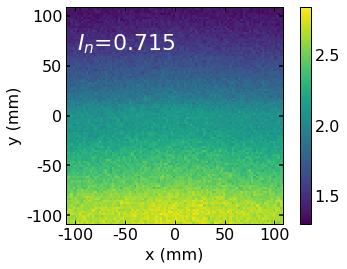

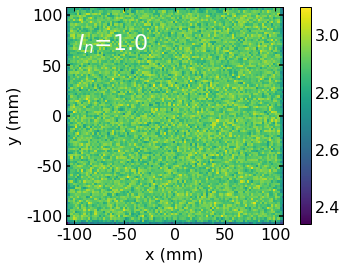

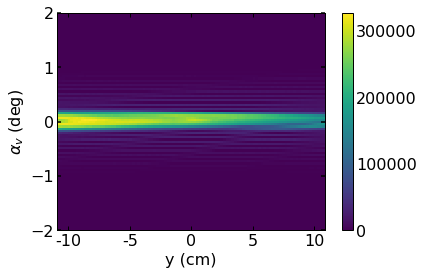

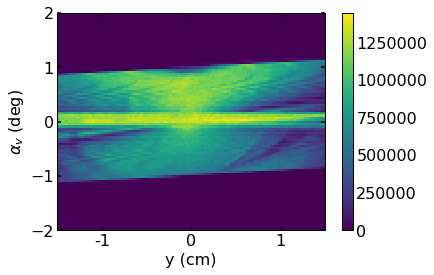

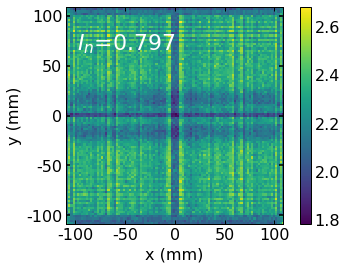

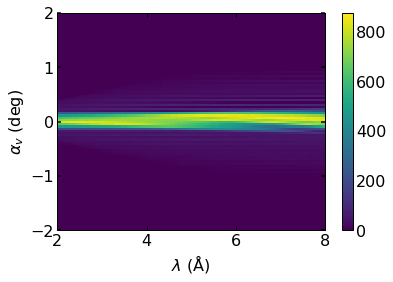

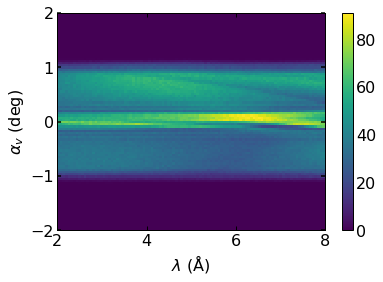

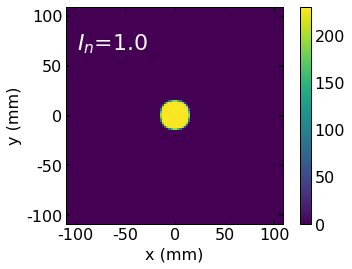

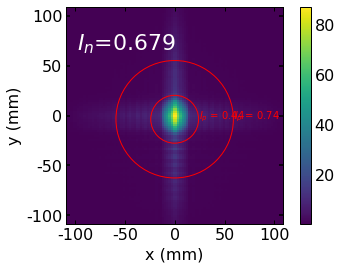

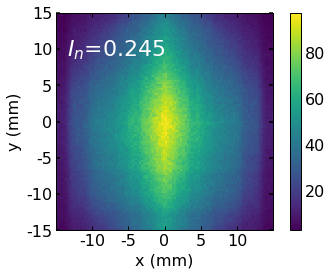

In [15]:
import copy
import image_thresholds
with open('data/data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    meta_data= pickle.load(file)
plt.style.use('/home/cherb/LRZSync/Doktorarbeit/Vorlagen_Verschiedenes/stylelibs/christoph.mplstyle')

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

image_data_normed = copy.deepcopy(image_data)
for key, value in image_data_normed.items():
    print(key, float(meta_data[key][' xylimits'].split(' ')[1]))
    value/=float(meta_data[key][' xylimits'].split(' ')[1])**2
images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data_normed )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'$I_n$={:.3}'.format(min([1.00, ratio])), transform=ax.transAxes, color='white', fontsize=22)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_data[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        print(midy, midx, extent)
        figax = fig, ax
        if "f_psd.dat" == key:
            image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
             figax=figax, extent=extent, thresholds=[k/0.679 for k in [0.30, 0.5, 0.70]])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'$I_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=22)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    ax.set_title('')
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_data[key][' g']) == 0 else 'finite'))

In [46]:
meta_dict.keys()

dict_keys(['g1_psd.dat', 'g1_divpos.dat', 'f_divpos.dat', 'sourceafteroptic_psd.dat', 'g1_divv_lambda.dat', 'f_divv_lambda.dat', 'source_psd.dat', 'f_psd.dat', 'f_psd_zoom.dat'])

# ESS geometry without gravity


In [21]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03*100
sim.num_neutrons = 5e7
pd = sim.params_dict
gravity = 0
sim.gravity = True if gravity else False
pd = sim.params_dict
pd['g'] = gravity
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=3.0 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=50000000.0 placeholder=1
mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=3.0 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=50000000.0 placeholder=1 -c -n 50000000.0
CompletedProcess(args=['mcrun', '/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr', 'det_width=0.218', 'det_width_focus=0.03', 'source_width=3.0', 'guide_width=0.218', 'L_source=5',

In [22]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()

with open('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

## Import data from pickle files

g1_psd.dat -10.9
g1_divpos.dat -0.109
g1_divv_lambda.dat 2.0
f_divv_lambda.dat 2.0
f_psd.dat -10.9
source_psd.dat -10.9
f_psd_zoom.dat -1.5
f_divpos.dat -0.015
source_psd_beforeoptic.dat -10.8157
sourceafteroptic_psd.dat -10.9
g1_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.715512286497197
49.509394867288904 49.4766317557457 [-10.9, 10.9, -10.9, 10.9]
0.0
g1_divpos.dat
0.0
g1_divv_lambda.dat
0.0
f_divv_lambda.dat
0.0
f_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 0.6807591546719044
49.50118263287147 49.4942247817591 [-10.9, 10.9, -10.9, 10.9]
-0.0012717147237530924 0.0002604181474552547
no suc 1.027900146842878
2.18 0.4405286343612334
5.668000000000001 0.7342143906020557
0.0
source_psd.dat
[-15. -10.  -5.   0.   5.  10.  15.]
intensity 1.1924033015635371
49.50126096010832 49.50004258580703 [-10.9, 10.9, -10.9, 10.9]
0.0
f_psd_zoom.dat
[-1.5 -1.  -0.5  0.   0.5  1.   1.5]
intensity 0.2651227721210293
49.52053683761495 49.49156964832158 [-1.5, 1.5, -1.5, 1.5]
0.0
f_

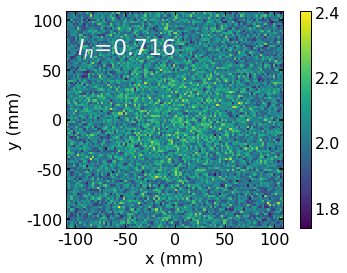

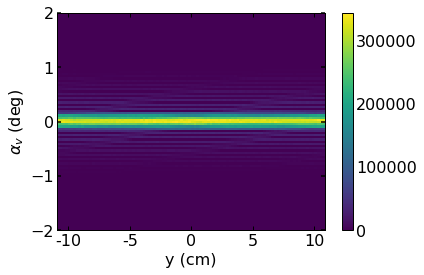

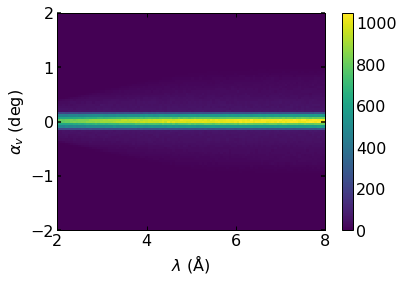

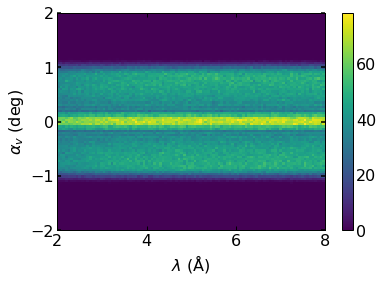

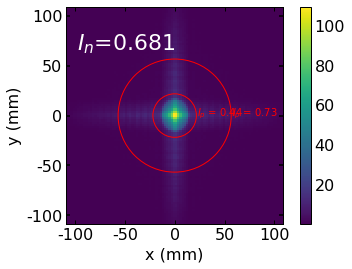

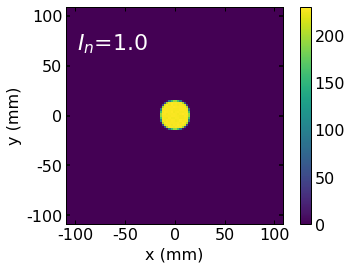

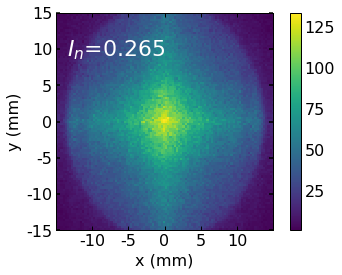

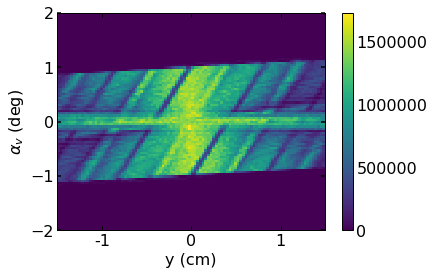

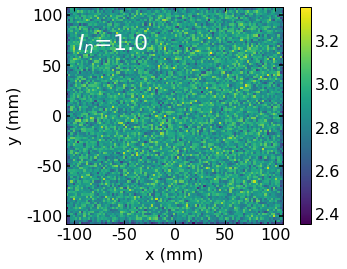

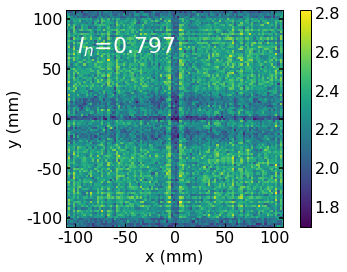

In [25]:
import copy
with open('data/data_zero_g_length160.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160.txt', 'rb') as file:
    image_metadata = pickle.load(file)
plt.style.use('/home/cherb/LRZSync/Doktorarbeit/Vorlagen_Verschiedenes/stylelibs/christoph.mplstyle')

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

image_data_normed = copy.deepcopy(image_data)
for key, value in image_data_normed.items():
    print(key, float(meta_data[key][' xylimits'].split(' ')[1]))
    value/=float(meta_data[key][' xylimits'].split(' ')[1])**2/5
images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data_normed )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'$I_n$={:.3}'.format(min([1.00, ratio])), transform=ax.transAxes, color='white', fontsize=22)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_data[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        print(midy, midx, extent)
        figax = fig, ax
        if 'f_psd.dat' == key:
            image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
                 figax=figax, extent=extent, thresholds=[k/0.681 for k in [0.30, 0.5, 0.70]])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'$I_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=22)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)') 
    ax.set_title('')   
    print(float(meta_data[key][' g']))
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if 0 == 0 else 'finite'))

In [15]:
print(pd['g'])

0
